In [158]:
import numpy as np 
import pandas as pd 
import seaborn as sns #
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
from plotly.offline import init_notebook_mode, iplot 
init_notebook_mode(connected=True) 
from sklearn.preprocessing import PowerTransformer
from yellowbrick.cluster import KElbowVisualizer
import lightgbm as lgb
import plotly.graph_objs as go 
import plotly.plotly as py 
import os
import warnings        
warnings.filterwarnings("ignore") 
plt.style.use('ggplot')

In [159]:
print(2151264683%15+1)
print(2151264683%15+2)

9
10


In [160]:
# df=pd.read_csv("../data/TH1.csv")
df =pd.read_csv("../data/GiaSMPvaSMPcap2021.csv",encoding="ISO-8859-1",delimiter=";")


In [161]:
df

,Ngay,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.0,1002.0
361,28/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,...,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6


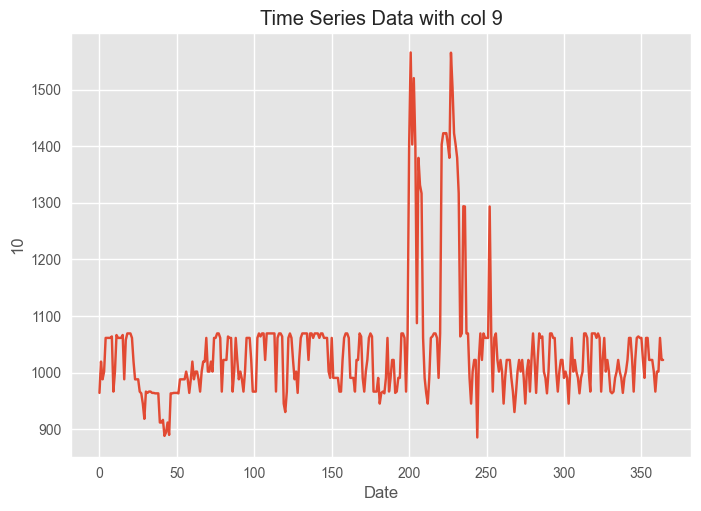

In [162]:
df.set_index('Ngay')
plt.plot(df.index,df['9'])
plt.title('Time Series Data with col 9')
plt.xlabel('Date')
plt.ylabel('10')
plt.show()

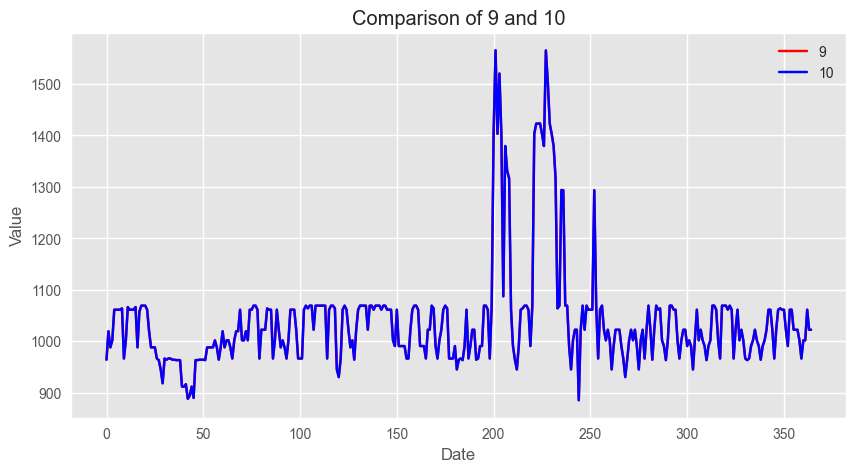

In [163]:
plt.figure(figsize=(10,5))
plt.plot(df['9'],color = 'red',label = '9')
plt.plot(df['10'],color = 'blue',label = '10')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of 9 and 10')
plt.legend()
plt.show()

In [164]:
feats= ['9','10']

In [165]:
data = df[feats]
data

,9,10
0,964.4,964.4
1,1019.7,1019.7
2,988.4,988.4
3,1002.1,1002.1
4,1061.5,1061.5
...,...,...
360,1002.0,1002.0
361,1002.0,1002.0
362,1061.5,1061.5
363,1022.6,1022.6


In [166]:
data.isnull().sum()

9     0
10    0
dtype: int64

# Gaussian mixture

In [167]:
transformer = PowerTransformer()
X=transformer.fit_transform(data)

In [168]:
X

array([[-6.38378239e-16, -6.66133815e-16],
       [ 0.00000000e+00, -5.55111512e-17],
       [-3.33066907e-16, -3.88578059e-16],
       [-1.66533454e-16, -2.22044605e-16],
       [ 3.33066907e-16,  3.05311332e-16],
       [ 3.33066907e-16,  3.05311332e-16],
       [ 3.33066907e-16,  3.05311332e-16],
       [ 3.33066907e-16,  3.05311332e-16],
       [ 3.60822483e-16,  3.33066907e-16],
       [-5.82867088e-16, -6.38378239e-16],
       [-1.66533454e-16, -2.22044605e-16],
       [ 3.88578059e-16,  3.60822483e-16],
       [ 3.33066907e-16,  3.05311332e-16],
       [ 3.33066907e-16,  3.05311332e-16],
       [ 3.33066907e-16,  3.05311332e-16],
       [ 3.88578059e-16,  3.60822483e-16],
       [-3.33066907e-16, -3.88578059e-16],
       [ 3.33066907e-16,  2.77555756e-16],
       [ 3.88578059e-16,  3.60822483e-16],
       [ 3.88578059e-16,  3.60822483e-16],
       [ 3.88578059e-16,  3.60822483e-16],
       [ 3.33066907e-16,  3.05311332e-16],
       [ 0.00000000e+00, -5.55111512e-17],
       [-3.

In [169]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2,random_state=1)
pca.fit(X)
PCA_ds = pd.DataFrame(pca.transform(data), columns=(["9","10"]))
PCA_ds.describe()

,9,10
count,365.000000,365.000000
mean,-1471.076710,-17.021124
std,148.698959,1.720367
min,-2213.803152,-25.614565
25%,-1501.087222,-17.368164
50%,-1446.077996,-16.731686
75%,-1397.715129,-16.172109
max,-1252.485117,-14.491741


Elbow Method to determine the number of clusters to be formed:


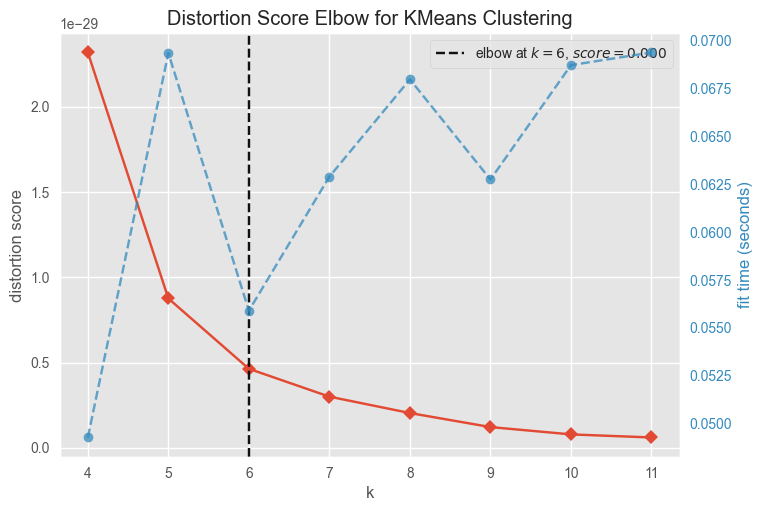

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [170]:
from sklearn.cluster import KMeans


print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(4,12))
Elbow_M.fit(X)
Elbow_M.show()

In [171]:
from sklearn.mixture import GaussianMixture


k = 6
# Thực hiện Gaussian Mixture Model
gmm = GaussianMixture(n_components=k) # Số components có thể điều chỉnh
gmm.fit(data.values.reshape(-1, 1))
gmm_labels = gmm.predict(data.values.reshape(-1, 1))

# Thực hiện KMeans clustering
kmeans = KMeans(n_clusters=k, n_init=10) # Số clusters có thể điều chỉnh
kmeans.fit(data.values.reshape(-1, 1))
kmeans_labels = kmeans.predict(data.values.reshape(-1, 1))

# In ra kết quả của mỗi mô hình
print("Gaussian Mixture Model labels:")
print(gmm_labels)
print("\nKMeans labels:")
print(kmeans_labels)


Gaussian Mixture Model labels:
[2 2 4 4 2 2 4 4 0 0 0 0 0 0 0 0 0 0 2 2 4 4 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0
 0 0 0 0 0 0 0 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 4 4 2 2 2 2 2 2 4 4 2 2 4 4 4 4 2 2 2 2 4 4 4 4 4 4 0 0 4 4 4 4 4 4 4 4
 0 0 0 0 0 0 0 0 0 0 2 2 4 4 4 4 4 4 0 0 0 0 0 0 2 2 4 4 0 0 4 4 2 2 4 4 2
 2 2 2 4 4 0 0 0 0 0 0 4 4 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 4 4 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 4 4 2 2 4 4 2 2 4
 4 0 0 0 0 0 0 0 0 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 4 4 4 4 0 0 4 4 4 4 4 4 4 4 2 2 2 2 4 4 0 0 0 0 0 0 0 0 4 4 4 4 4 4 2 2 4
 4 4 4 0 0 0 0 4 4 2 2 4 4 4 4 0 0 0 0 0 0 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2 2
 4 4 0 0 2 2 4 4 4 4 4 4 2 2 2 2 4 4 4 4 0 0 0 0 0 0 2 2 0 0 3 3 5 5 3 3 5
 5 3 3 2 2 3 3 1 1 1 1 0 0 4 4 2 2 2 2 4 4 0 0 0 0 0 0 0 0 0 0 4 4 0 0 3 3
 3 3 3 3 3 3 3 3 3 3 5 5 5 5 3 3 3 3 3 3 1 1 0 0 0 0 1 1 1 1 0 0 0 0 

In [172]:
from sklearn.mixture import BayesianGaussianMixture


BGM = BayesianGaussianMixture(n_components=7,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = BGM.fit_predict(X)
PCA_ds["Clusters"] = preds
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= preds

In [173]:
pp=BGM.predict_proba(X)# Calcualting the probabilities of each prediction
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(7)]]=pp # creating new dataframe columns of probabilites 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(7):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.68)].index
    train_index = np.concatenate((train_index, n_inx))

In [174]:
#ricopue's notebook's code snippet
from sklearn.model_selection import StratifiedKFold
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(11)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15


In [175]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [176]:
labels=np.argmax(lgb_preds,axis=1)

# ARIMA model

In [177]:
data = pd.read_csv("../data/GiaSMPvaSMPcap2021.csv",encoding="ISO-8859-1",delimiter=";")
data


,Ngay,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.0,1002.0
361,28/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,...,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6


In [178]:
data['Ngay'] = pd.to_datetime(data['Ngay'], format='%d/%m/%Y')
data.set_index('Ngay', inplace=True)

## Phân tích tính dừng


In [179]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['9'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.786430
p-value: 0.060238


In [180]:
data =df[feats]

## Xây dựng mô hình ARIMA

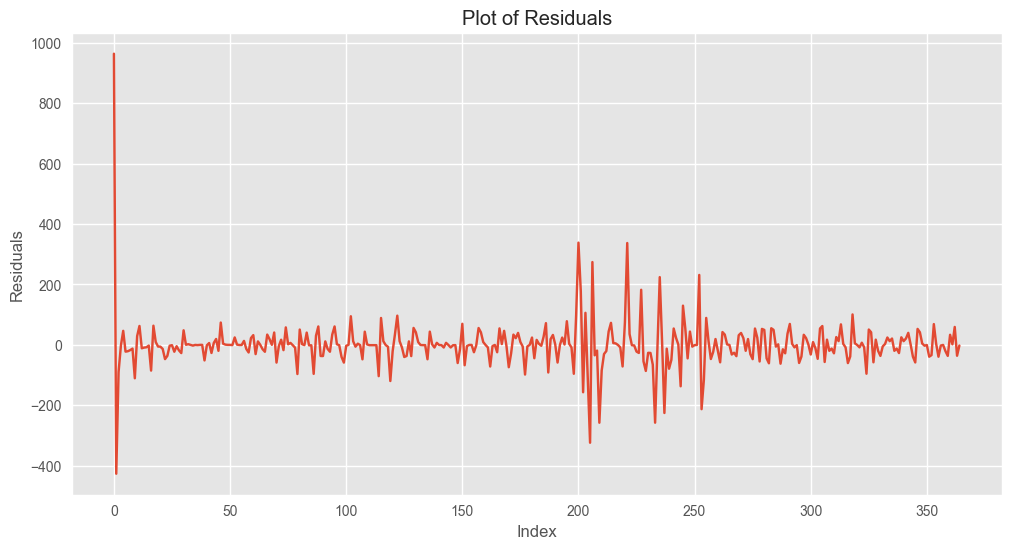

In [181]:
import matplotlib.pyplot as plt

# Giả sử model_fit là kết quả sau khi fit mô hình ARIMA
model = ARIMA(data['10'], order=(1,2,1))
model_fit = model.fit()

# Vẽ biểu đồ residuals
plt.figure(figsize=(12,6))
residuals = model_fit.resid
plt.plot(residuals)
plt.xlabel('Index')  # Chỉ số mẫu là thích hợp hơn cho trục x
plt.ylabel('Residuals')  # Residuals nên nằm trên trục y
plt.title('Plot of Residuals')
plt.show()


## biểu đồ hàm tự tương quan

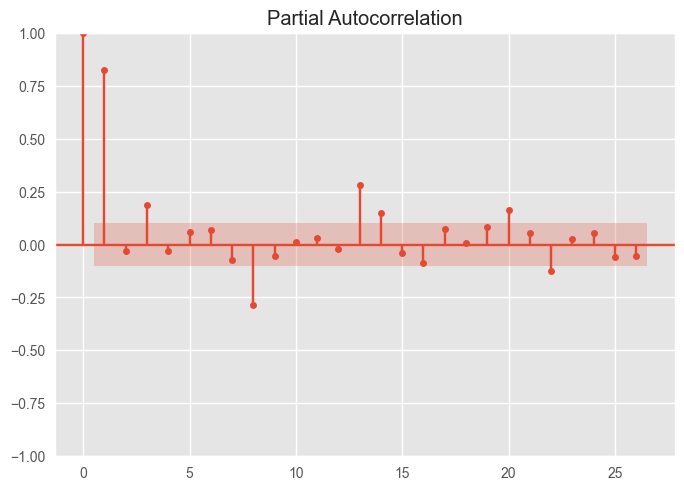

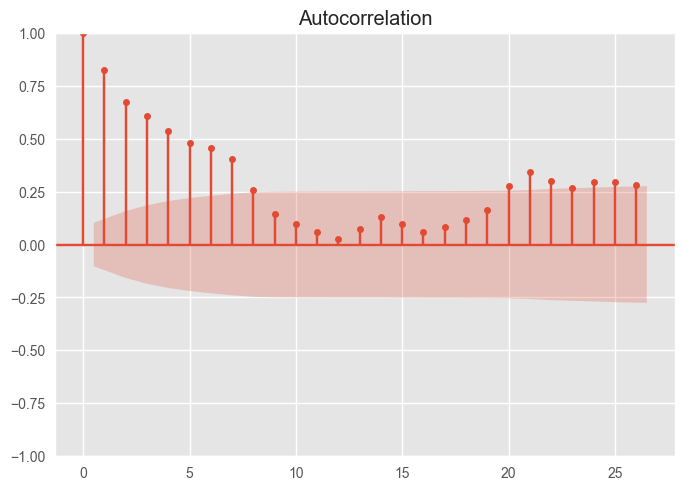

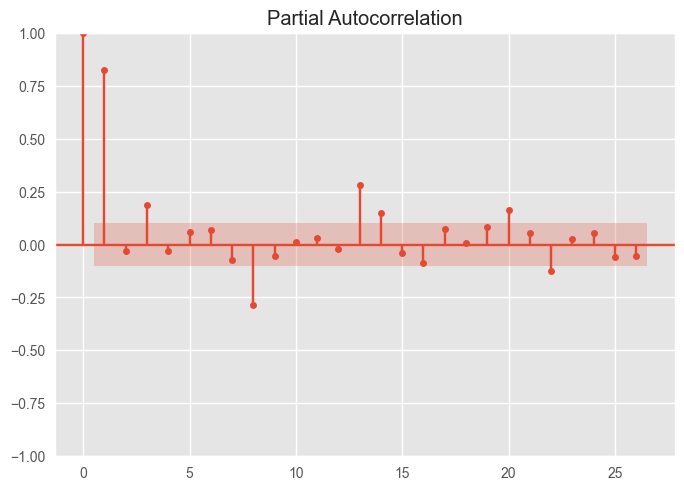

In [182]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['9'])
plot_pacf(data['9'])

In [183]:
from statsmodels.tsa.arima.model import ARIMA

# Giả sử bạn chọn p=1, d=1, q=1 sau khi phân tích
model = ARIMA(data['9'], order=(1,1,1))
model_fit = model.fit()

## Dự báo 5 ngày kế tiếp

In [184]:
# Dự báo 5 bước tiếp theo
forecast = model_fit.forecast(steps=5)
print(forecast)


365    1024.290452
366    1025.660854
367    1026.771798
368    1027.672409
369    1028.402509
Name: predicted_mean, dtype: float64
